#Python Implementation of Perceptron Function

In [ ]:
# Function to compute the output of a single neuron in a perceptron model
# The first element in vector x (input vector) must be 1 to account for the bias term.
# The lengths of vectors w (weight vector) and x (input vector) must be n+1 for a neuron with n inputs.
def compute_output(w, x):
    # Initialize the weighted sum to zero
    z = 0.0

    # Compute the weighted sum of inputs
    for i in range(len(w)):
        z += x[i] * w[i]  # Multiply each input by its corresponding weight and add to the sum

    # Apply the sign function to determine the neuron's output
    if z < 0:  # If the weighted sum is negative
        return -1  # Return -1 as the output
    else:  # If the weighted sum is non-negative
        return 1  # Return 1 as the output

In [ ]:
# Define test cases for the compute_output function
# Each test case includes:
# - w: The weight vector
# - x: The input vector (with the first element as 1 to represent the bias term)
test_cases = [
    ([0.9, -0.6, -0.5], [1.0, -1.0, -1.0]),  # Test case 1
    ([0.9, -0.6, -0.5], [1.0, -1.0, 1.0]),   # Test case 2
    ([0.9, -0.6, -0.5], [1.0, 1.0, -1.0]),   # Test case 3
    ([0.9, -0.6, -0.5], [1.0, 1.0, 1.0]),    # Test case 4
]

# Iterate through each test case and compute the output
for w, x in test_cases:
    # Call the compute_output function with the current weight and input vectors
    output = compute_output(w, x)
    # Print the weight vector, input vector, and the corresponding output
    print(f"w: {w}, x: {x} => Output: {output}")

w: [0.9, -0.6, -0.5], x: [1.0, -1.0, -1.0] => Output: 1
w: [0.9, -0.6, -0.5], x: [1.0, -1.0, 1.0] => Output: 1
w: [0.9, -0.6, -0.5], x: [1.0, 1.0, -1.0] => Output: 1
w: [0.9, -0.6, -0.5], x: [1.0, 1.0, 1.0] => Output: -1


#Initialization Code for ur Perceptron Learning Example

In [ ]:
import random

# Function to display the current weights of the perceptron
def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =', '%5.2f' % w[1],
          ', w2 =', '%5.2f' % w[2])

# Define variables needed to control the training process.
random.seed(7)  # Set the random seed to make the results repeatable
LEARNING_RATE = 0.1  # Define the learning rate for the perceptron
index_list = [0, 1, 2, 3]  # List of indices to randomize the order of training examples

# Define the training examples.
x_train = [
    (1.0, -1.0, -1.0),  # Input 1 (bias term included as the first element)
    (1.0, -1.0, 1.0),   # Input 2
    (1.0, 1.0, -1.0),   # Input 3
    (1.0, 1.0, 1.0)     # Input 4
]  # Input vectors for training
y_train = [1.0, 1.0, 1.0, -1.0]  # Corresponding output (ground truth) for each input

# Initialize perceptron weights.
w = [0.2, -0.6, 0.25]  # Initial weights, set to arbitrary values

# Print the initial weights before training begins.
show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


#Perceptron Training Loop

In [ ]:
# Perceptron training loop to adjust weights based on errors
all_correct = False  # Initialize the flag to track if all examples are classified correctly

# Repeat until all examples are classified correctly
while not all_correct:
    all_correct = True  # Assume all examples are classified correctly at the start of each iteration
    random.shuffle(index_list)  # Randomize the order of training examples for better generalization

    # Loop through each training example
    for i in index_list:
        x = x_train[i]  # Get the input vector for the current example
        y = y_train[i]  # Get the corresponding ground truth output
        p_out = compute_output(w, x)  # Compute the perceptron output using the current weights

        # If the perceptron's output does not match the ground truth
        if y != p_out:
            # Update the weights based on the perceptron learning rule
            for j in range(len(w)):
                w[j] += y * LEARNING_RATE * x[j]  # Adjust weight w[j] based on the error and input x[j]
            all_correct = False  # Mark that not all examples are classified correctly

    # Display the updated weights after processing all examples
    show_learning(w)

w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


Handle the case where w[2] is very close to zero (to avoid division by zero)

w0 =  0.30 , w1 = -0.60 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.25
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.40 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 =  0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.30 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.50 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15
w0 =  0.40 , w1 = -0.40 , w2 = -0.15
w0 =  0.40 , w1 = -0.40 , w2 = -0.15


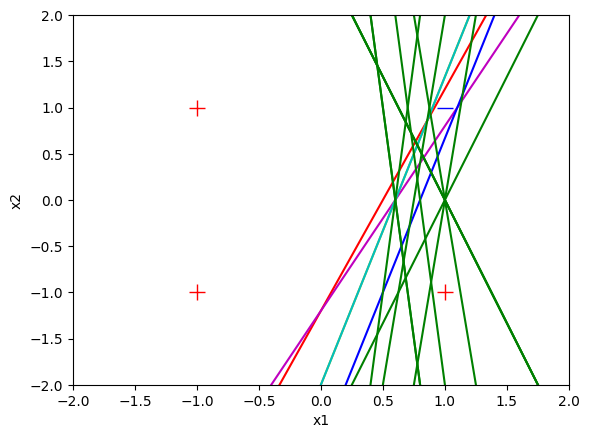

In [ ]:
# Perceptron training loop: Adjusts weights to minimize classification errors
all_correct = False  # Initialize a flag to track if all training examples are correctly classified

while not all_correct:  # Continue training until all examples are classified correctly
    all_correct = True  # Assume all examples are correct at the start of the iteration
    random.shuffle(index_list)  # Randomize the order of training examples to improve learning

    # Loop through the training examples in the randomized order
    for i in index_list:
        x = x_train[i]  # Retrieve the input vector for the current example
        y = y_train[i]  # Retrieve the corresponding target output (ground truth)
        p_out = compute_output(w, x)  # Compute perceptron output using the current weights

        # Check if the perceptron's output matches the expected output
        if y != p_out:  # If the output is incorrect, update the weights
            for j in range(len(w)):  # Iterate through each weight
                # Update the weight using the perceptron learning rule
                w[j] += y * LEARNING_RATE * x[j]  # Adjust the weight based on error
                # Show the updated weights and decision boundary after each iteration
                show_learning(w)
                all_correct = False  # Set the flag to False to continue training

    # Show the updated weights and decision boundary after each iteration
    show_learning(w)